Train Taxonomy Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142246 entries, 0 to 142245
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   EntryID     142246 non-null  object
 1   taxonomyID  142246 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.2+ MB
None

Train Taxonomy Data Sample:
  EntryID  taxonomyID
0  Q8IXT2        9606
1  Q04418      559292
2  A8DYA3        7227
3  Q9UUI3      284812
4  Q57ZS4      185431

Train Terms Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5363863 entries, 0 to 5363862
Data columns (total 3 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   EntryID  object
 1   term     object
 2   aspect   object
dtypes: object(3)
memory usage: 122.8+ MB
None

Train Terms Data Sample:
      EntryID        term aspect
0  A0A009IHW8  GO:0008152    BPO
1  A0A009IHW8  GO:0034655    BPO
2  A0A009IHW8  GO:0072523    BPO
3  A0A009IHW8  GO:0044270    BPO

/var/folders/py/s4_9mdhd5f9g7_yprmx9ywlr0000gn/T/ipykernel_18741/1635308648.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taxonomy_counts.head(10).values, y=taxonomy_counts.head(10).index, palette="magma")


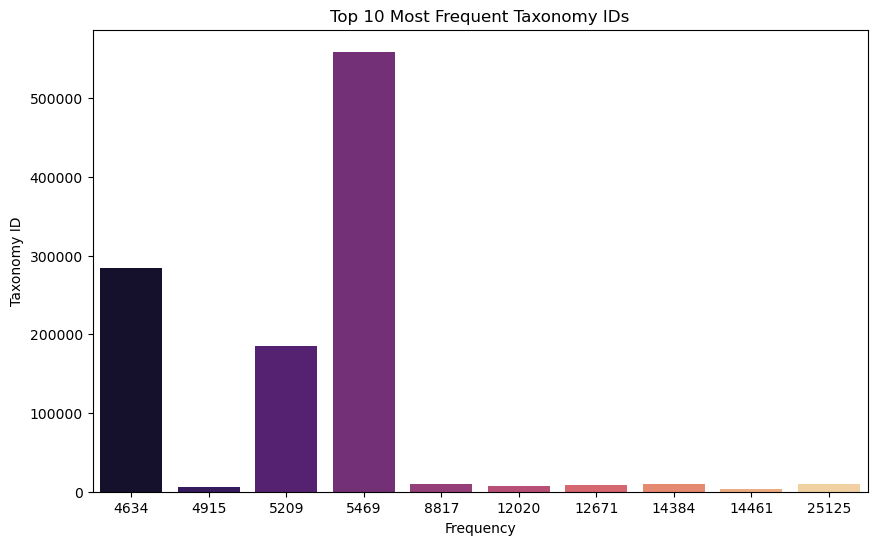


Top 10 Most Frequent GO Terms:
term
GO:0005575    92912
GO:0008150    92210
GO:0110165    91286
GO:0003674    78637
GO:0005622    70785
GO:0009987    61293
GO:0043226    60883
GO:0043229    58315
GO:0005488    57380
GO:0043227    55452
Name: count, dtype: int64


/var/folders/py/s4_9mdhd5f9g7_yprmx9ywlr0000gn/T/ipykernel_18741/1635308648.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=go_term_counts.head(10).values, y=go_term_counts.head(10).index, palette="viridis")


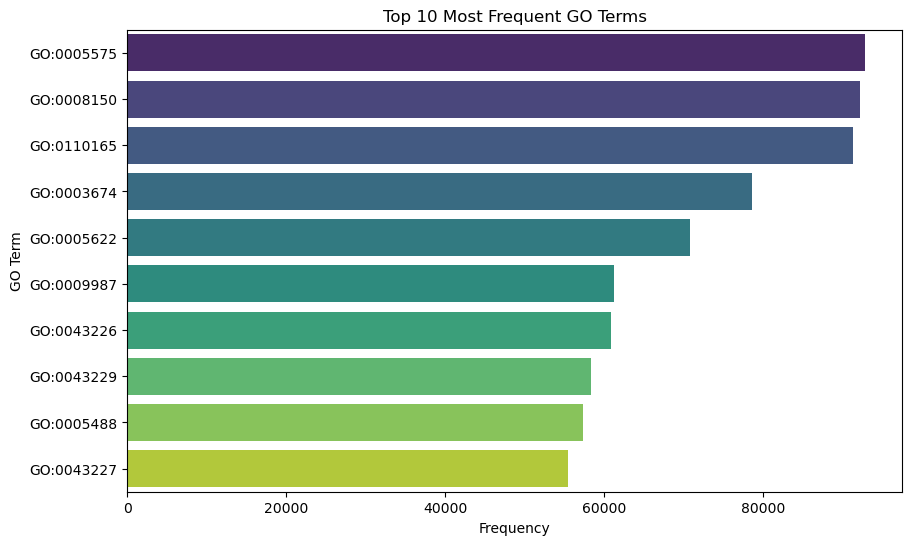


Aspect Distribution in GO Terms:
aspect
BPO    3497732
CCO    1196017
MFO     670114
Name: count, dtype: int64


/var/folders/py/s4_9mdhd5f9g7_yprmx9ywlr0000gn/T/ipykernel_18741/1635308648.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=aspect_counts.index, y=aspect_counts.values, palette="coolwarm")


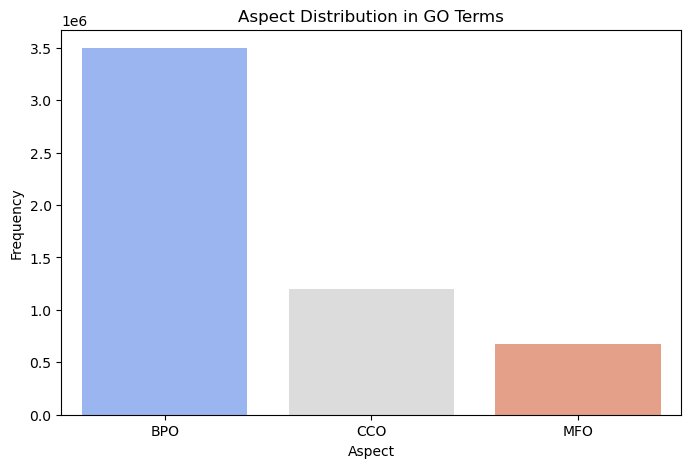


Merging train_taxonomy and train_terms datasets...
Merged Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5363863 entries, 0 to 5363862
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   EntryID     object
 1   taxonomyID  int64 
 2   term        object
 3   aspect      object
dtypes: int64(1), object(3)
memory usage: 163.7+ MB
None

Merged Data Sample:
  EntryID  taxonomyID        term aspect
0  Q8IXT2        9606  GO:0003677    MFO
1  Q8IXT2        9606  GO:1990837    MFO
2  Q8IXT2        9606  GO:0003676    MFO
3  Q8IXT2        9606  GO:0005488    MFO
4  Q8IXT2        9606  GO:0003690    MFO

Top 10 Taxonomy IDs by Number of GO Terms:
taxonomyID
9606      17713
10090     16696
10116     12055
7227       9138
3702       7771
559292     7667
7955       6199
6239       6025
284812     5709
83333      5135
Name: term, dtype: int64


/var/folders/py/s4_9mdhd5f9g7_yprmx9ywlr0000gn/T/ipykernel_18741/1635308648.py:109: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taxonomy_go_counts.head(10).values, y=taxonomy_go_counts.head(10).index, palette="cubehelix")


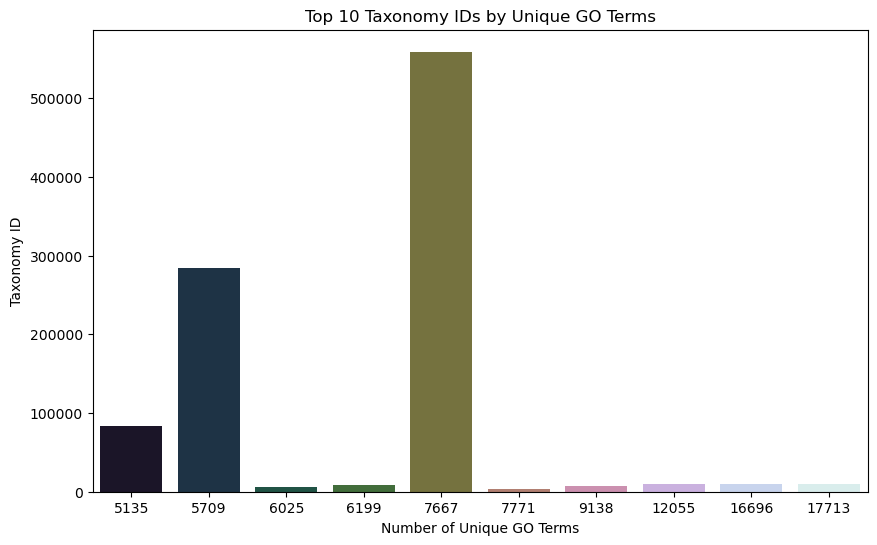

In [1]:
# EDA
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# File and folder paths
base_dir = "./"
train_folder = os.path.join(base_dir, "Train")
test_folder = os.path.join(base_dir, "Test (Targets)")

# File paths
train_taxonomy_file = os.path.join(train_folder, "train_taxonomy.tsv")
train_terms_file = os.path.join(train_folder, "train_terms.tsv")

# Helper function to load TSV files with robust encoding handling
def load_tsv(file_path):
    """
    Load a TSV file, retrying with alternate encoding if needed.
    """
    try:
        return pd.read_csv(file_path, sep="\t", encoding="utf-8")
    except UnicodeDecodeError:
        print(f"UnicodeDecodeError: Retrying with 'latin-1' encoding for {file_path}")
        return pd.read_csv(file_path, sep="\t", encoding="latin-1")

# Load data
train_taxonomy = load_tsv(train_taxonomy_file)
train_terms = load_tsv(train_terms_file)

# EDA for train_taxonomy.tsv
print("Train Taxonomy Data Summary:")
print(train_taxonomy.info())
print("\nTrain Taxonomy Data Sample:")
print(train_taxonomy.head())

# EDA for train_terms.tsv
print("\nTrain Terms Data Summary:")
print(train_terms.info())
print("\nTrain Terms Data Sample:")
print(train_terms.head())

# Check for missing values
print("\nMissing Values in Train Taxonomy:")
print(train_taxonomy.isnull().sum())

print("\nMissing Values in Train Terms:")
print(train_terms.isnull().sum())

# Unique taxonomy IDs
print("\nUnique taxonomy IDs in train_taxonomy.tsv:")
print(train_taxonomy["taxonomyID"].nunique())

# Unique GO terms
print("\nUnique GO terms in train_terms.tsv:")
print(train_terms["term"].nunique())

# Distribution of taxonomy IDs
print("\nTop 10 Most Frequent Taxonomy IDs:")
taxonomy_counts = train_taxonomy["taxonomyID"].value_counts()
print(taxonomy_counts.head(10))

plt.figure(figsize=(10, 6))
sns.barplot(x=taxonomy_counts.head(10).values, y=taxonomy_counts.head(10).index, palette="magma")
plt.title("Top 10 Most Frequent Taxonomy IDs")
plt.xlabel("Frequency")
plt.ylabel("Taxonomy ID")
plt.show()

# Distribution of GO terms
print("\nTop 10 Most Frequent GO Terms:")
go_term_counts = train_terms["term"].value_counts()
print(go_term_counts.head(10))

plt.figure(figsize=(10, 6))
sns.barplot(x=go_term_counts.head(10).values, y=go_term_counts.head(10).index, palette="viridis")
plt.title("Top 10 Most Frequent GO Terms")
plt.xlabel("Frequency")
plt.ylabel("GO Term")
plt.show()

# Distribution of aspects (e.g., BPO)
print("\nAspect Distribution in GO Terms:")
aspect_counts = train_terms["aspect"].value_counts()
print(aspect_counts)

plt.figure(figsize=(8, 5))
sns.barplot(x=aspect_counts.index, y=aspect_counts.values, palette="coolwarm")
plt.title("Aspect Distribution in GO Terms")
plt.xlabel("Aspect")
plt.ylabel("Frequency")
plt.show()

# Merge datasets to analyze relationships
print("\nMerging train_taxonomy and train_terms datasets...")
merged_data = pd.merge(train_taxonomy, train_terms, on="EntryID", how="inner")

print("Merged Data Summary:")
print(merged_data.info())
print("\nMerged Data Sample:")
print(merged_data.head())

# Analyze relationships between taxonomyID and GO terms
print("\nTop 10 Taxonomy IDs by Number of GO Terms:")
taxonomy_go_counts = merged_data.groupby("taxonomyID")["term"].nunique().sort_values(ascending=False)
print(taxonomy_go_counts.head(10))

plt.figure(figsize=(10, 6))
sns.barplot(x=taxonomy_go_counts.head(10).values, y=taxonomy_go_counts.head(10).index, palette="cubehelix")
plt.title("Top 10 Taxonomy IDs by Unique GO Terms")
plt.xlabel("Number of Unique GO Terms")
plt.ylabel("Taxonomy ID")
plt.show()


In [2]:
# Data Preprocessing
import pandas as pd
import numpy as np

# File and folder paths
train_folder = "./Train"
train_taxonomy_file = os.path.join(train_folder, "train_taxonomy.tsv")
train_terms_file = os.path.join(train_folder, "train_terms.tsv")

# Helper function to load TSV files with robust encoding handling
def load_tsv(file_path):
    """
    Load a TSV file, retrying with alternate encoding if needed.
    """
    try:
        return pd.read_csv(file_path, sep="\t", encoding="utf-8")
    except UnicodeDecodeError:
        print(f"UnicodeDecodeError: Retrying with 'latin-1' encoding for {file_path}")
        return pd.read_csv(file_path, sep="\t", encoding="latin-1")

# Load datasets
train_taxonomy = load_tsv(train_taxonomy_file)
train_terms = load_tsv(train_terms_file)

# Preprocessing Function
def preprocess_data(taxonomy_df, terms_df):
    """
    Preprocess the train_taxonomy and train_terms datasets.
    Steps:
    1. Remove duplicates.
    2. Handle missing values.
    3. Filter invalid data entries.
    4. Encode categorical features if necessary.
    5. Normalize and transform data for downstream tasks.
    """
    # Step 1: Remove duplicates
    print("\nRemoving duplicates...")
    taxonomy_df = taxonomy_df.drop_duplicates()
    terms_df = terms_df.drop_duplicates()
    print(f"train_taxonomy shape after removing duplicates: {taxonomy_df.shape}")
    print(f"train_terms shape after removing duplicates: {terms_df.shape}")

    # Step 2: Handle missing values
    print("\nHandling missing values...")
    taxonomy_missing = taxonomy_df.isnull().sum()
    terms_missing = terms_df.isnull().sum()
    print("Missing values in train_taxonomy:")
    print(taxonomy_missing)
    print("\nMissing values in train_terms:")
    print(terms_missing)

    # Drop rows with missing values if applicable
    taxonomy_df = taxonomy_df.dropna()
    terms_df = terms_df.dropna()
    print(f"train_taxonomy shape after dropping missing values: {taxonomy_df.shape}")
    print(f"train_terms shape after dropping missing values: {terms_df.shape}")

    # Step 3: Filter invalid data
    print("\nFiltering invalid entries...")
    # Ensure taxonomyID is numeric and positive
    taxonomy_df = taxonomy_df[taxonomy_df["taxonomyID"].apply(lambda x: str(x).isdigit())]
    taxonomy_df["taxonomyID"] = taxonomy_df["taxonomyID"].astype(int)
    taxonomy_df = taxonomy_df[taxonomy_df["taxonomyID"] > 0]
    print(f"train_taxonomy shape after filtering invalid taxonomyID: {taxonomy_df.shape}")

    # Ensure GO terms follow the "GO:0000000" format
    terms_df = terms_df[terms_df["term"].str.match(r"GO:\d{7}")]
    print(f"train_terms shape after filtering invalid GO terms: {terms_df.shape}")

    # Step 4: Encode categorical features
    print("\nEncoding categorical features...")
    aspect_mapping = {label: idx for idx, label in enumerate(terms_df["aspect"].unique())}
    terms_df["aspect_encoded"] = terms_df["aspect"].map(aspect_mapping)
    print("Aspect encoding mapping:", aspect_mapping)

    # Step 5: Normalize data (if applicable)
    print("\nNormalizing taxonomyID...")
    taxonomy_df["taxonomyID_normalized"] = (taxonomy_df["taxonomyID"] - taxonomy_df["taxonomyID"].mean()) / taxonomy_df["taxonomyID"].std()

    # Merge processed datasets for downstream tasks
    print("\nMerging processed datasets...")
    processed_data = pd.merge(taxonomy_df, terms_df, on="EntryID", how="inner")
    print(f"Processed data shape: {processed_data.shape}")

    return processed_data

# Preprocess data
processed_data = preprocess_data(train_taxonomy, train_terms)

# Save processed data for later use
processed_data.to_csv("processed_data.csv", index=False)
print("\nProcessed data saved to 'processed_data.csv'.")



Removing duplicates...
train_taxonomy shape after removing duplicates: (142246, 2)
train_terms shape after removing duplicates: (5363863, 3)

Handling missing values...
Missing values in train_taxonomy:
EntryID       0
taxonomyID    0
dtype: int64

Missing values in train_terms:
EntryID    0
term       0
aspect     0
dtype: int64
train_taxonomy shape after dropping missing values: (142246, 2)
train_terms shape after dropping missing values: (5363863, 3)

Filtering invalid entries...
train_taxonomy shape after filtering invalid taxonomyID: (142246, 2)
train_terms shape after filtering invalid GO terms: (5363863, 3)

Encoding categorical features...
Aspect encoding mapping: {'BPO': 0, 'CCO': 1, 'MFO': 2}

Normalizing taxonomyID...

Merging processed datasets...
Processed data shape: (5363863, 6)

Processed data saved to 'processed_data.csv'.


In [3]:
# Feature Engineering
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import CountVectorizer

# Load the processed dataset
processed_file = "processed_data.csv"
data = pd.read_csv(processed_file)

# Feature Engineering Function
def feature_engineering(data):
    """
    Perform feature engineering on the dataset.
    Steps:
    1. Extract features from GO terms and aspects.
    2. Scale numeric features.
    3. Add derived features.
    """
    print("\nStarting Feature Engineering...")

    # Step 1: Extract features from GO terms
    print("Extracting features from GO terms...")
    data["GO_term_number"] = data["term"].str.extract(r"GO:(\d{7})").astype(int)

    # Encode GO terms numerically
    print("Encoding GO terms...")
    go_term_encoder = LabelEncoder()
    data["GO_term_encoded"] = go_term_encoder.fit_transform(data["term"])
    print(f"Number of unique GO terms: {len(go_term_encoder.classes_)}")

    # Step 2: Scale numeric features
    print("Scaling numeric features...")
    scaler = StandardScaler()
    numeric_features = ["taxonomyID", "GO_term_number", "taxonomyID_normalized"]
    data[numeric_features] = scaler.fit_transform(data[numeric_features])

    # Step 3: Add derived features
    print("Adding derived features...")
    # Count the number of GO terms per EntryID
    data["GO_term_count"] = data.groupby("EntryID")["term"].transform("count")

    # Aspect as one-hot encoded features
    print("One-hot encoding aspect column...")
    aspect_one_hot = pd.get_dummies(data["aspect"], prefix="aspect")
    data = pd.concat([data, aspect_one_hot], axis=1)

    # Create interaction features
    print("Creating interaction features...")
    data["taxonomyID_x_GO_term"] = data["taxonomyID"] * data["GO_term_number"]

    # Step 4: Text-based feature extraction (optional, if textual data exists)
    if "aspect" in data.columns:
        print("Extracting text-based features from aspect (if applicable)...")
        vectorizer = CountVectorizer()
        aspect_features = vectorizer.fit_transform(data["aspect"])
        aspect_df = pd.DataFrame(aspect_features.toarray(), columns=vectorizer.get_feature_names_out())
        data = pd.concat([data, aspect_df], axis=1)

    print("\nFeature Engineering Completed.")
    return data

# Apply Feature Engineering
engineered_data = feature_engineering(data)

# Save engineered dataset
engineered_file = "engineered_data.csv"
engineered_data.to_csv(engineered_file, index=False)
print(f"Engineered data saved to '{engineered_file}'.")



Starting Feature Engineering...
Extracting features from GO terms...
Encoding GO terms...
Number of unique GO terms: 31466
Scaling numeric features...
Adding derived features...
One-hot encoding aspect column...
Creating interaction features...
Extracting text-based features from aspect (if applicable)...

Feature Engineering Completed.
Engineered data saved to 'engineered_data.csv'.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier  # For Approximate SVM
from sklearn.decomposition import PCA  # For dimensionality reduction
from sklearn.metrics import accuracy_score, classification_report
import joblib  # To save models

# Load the engineered dataset
engineered_file = "engineered_data.csv"
data = pd.read_csv(engineered_file)

# Features and target variable
X = data.drop(columns=["EntryID", "term", "aspect", "taxonomyID_x_GO_term"], errors="ignore")  # Drop unnecessary columns
y = data["taxonomyID"].astype(int)  # Ensure the target variable is integer (categorical)

# Train-test split
print("Splitting data into training and testing sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Training data size: {X_train.shape}")
print(f"Testing data size: {X_test.shape}")

# Model configurations
models = {
    "NaiveBayes": GaussianNB(),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SGDClassifier (Approximate SVM)": SGDClassifier(loss="hinge", random_state=42, max_iter=1000, tol=1e-3)
}

# Optional: PCA for dimensionality reduction
use_pca = True
if use_pca:
    print("Reducing dimensions using PCA...")
    # Dynamically adjust n_components to the number of features
    n_components = min(12, X_train.shape[1])  # Replace 12 with the actual feature count if dynamically unknown
    pca = PCA(n_components=n_components, random_state=42)
    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)
    print("PCA completed.")

# Training and saving models
trained_models = {}
for model_name, model in models.items():
    try:
        print(f"\nTraining {model_name}...")
        model.fit(X_train, y_train)
        print(f"{model_name} training completed.")

        # Evaluate the model
        print(f"Evaluating {model_name} on the test set...")
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"{model_name} Accuracy: {accuracy:.4f}")
        print(f"{model_name} Classification Report:\n{classification_report(y_test, y_pred)}")

        # Save the trained model
        model_path = f"{model_name.replace(' ', '_')}.pth"
        joblib.dump(model, model_path)
        print(f"{model_name} model saved as '{model_path}'.")
        trained_models[model_name] = model

    except Exception as e:
        print(f"An error occurred while training {model_name}: {e}")

# SVM Model (Subset Approach)
try:
    print("\nTraining SVM on a subset of the data...")
    subset_size = 10000

    # Sampling data for the subset
    subset_size = min(subset_size, len(X_train))  # Ensure subset size does not exceed the number of samples
    sampled_indices = pd.Series(range(len(X_train))).sample(n=subset_size, random_state=42)
    X_train_subset = X_train[sampled_indices]
    y_train_subset = y_train.iloc[sampled_indices]

    # Train the SVM model
    svm_model = SVC(kernel="linear", probability=True, random_state=42)
    svm_model.fit(X_train_subset, y_train_subset)
    print("SVM training completed on subset.")

    # Evaluate the SVM model
    print("Evaluating SVM on the test set...")
    y_pred = svm_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"SVM Accuracy: {accuracy:.4f}")
    print(f"SVM Classification Report:\n{classification_report(y_test, y_pred)}")

    # Save the trained SVM model
    joblib.dump(svm_model, "SVM_Subset.pth")
    print("SVM model saved as 'SVM_Subset.pth'.")

except Exception as e:
    print(f"An error occurred while training SVM: {e}")

print("\nAll models trained and saved successfully.")


Splitting data into training and testing sets...
Training data size: (4291090, 12)
Testing data size: (1072773, 12)
Reducing dimensions using PCA...
PCA completed.

Training NaiveBayes...
NaiveBayes training completed.
Evaluating NaiveBayes on the test set...
NaiveBayes Accuracy: 0.9751
NaiveBayes Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99    954213
           1       0.66      1.00      0.80     50026
           2       0.96      0.63      0.76      2701
           3       0.98      1.00      0.99     62888
           4       0.71      0.92      0.80       446
           5       0.87      0.84      0.85       279
           6       0.98      0.98      0.98       752
           7       0.92      0.91      0.91       433
           8       0.86      0.86      0.86       255
           9       0.85      1.00      0.92        83
          10       0.96      0.99      0.97        86
          11       0.97      

In [5]:
# Model Selection
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report
from sklearn.utils import resample
import joblib

# Load the engineered dataset
engineered_file = "engineered_data.csv"
data = pd.read_csv(engineered_file)

# Features and target variable
X = data.drop(columns=["EntryID", "term", "aspect", "taxonomyID_x_GO_term"], errors="ignore")
y = data["taxonomyID"].astype(int)  # Ensure target is integer

# Train-test split
print("Splitting data into training and testing sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Training data size: {X_train.shape}")
print(f"Testing data size: {X_test.shape}")

# Scaling features
print("Scaling numeric features...")
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model configurations
models = {
    "NaiveBayes": GaussianNB(),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SGDClassifier (Approximate SVM)": SGDClassifier(loss="hinge", random_state=42, max_iter=1000, tol=1e-3)
}

# Train and save models
trained_models = {}
for model_name, model in models.items():
    try:
        print(f"\nTraining {model_name}...")
        if model_name == "SGDClassifier (Approximate SVM)":
            model.partial_fit(X_train, y_train, classes=np.unique(y_train))
        else:
            model.fit(X_train, y_train)
        
        print(f"{model_name} training completed.")

        # Evaluate the model
        print(f"Evaluating {model_name} on the test set...")
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"{model_name} Accuracy: {accuracy:.4f}")
        print(f"{model_name} Classification Report:\n{classification_report(y_test, y_pred)}")

        # Save model with compression
        model_path = f"{model_name.replace(' ', '_')}.pth"
        joblib.dump(model, model_path, compress=3)
        print(f"{model_name} model saved as '{model_path}' (compressed).")
        trained_models[model_name] = model

    except Exception as e:
        print(f"An error occurred while training {model_name}: {e}")

# SVM with subsampling
try:
    print("\nTraining SVM on a subset of the data...")
    subset_size = 10000
    subset_size = min(subset_size, len(X_train))  # Ensure subset size is valid

    X_train_subset, y_train_subset = resample(X_train, y_train, n_samples=subset_size, random_state=42)

    pca = PCA(n_components=12, random_state=42)
    X_train_pca_subset = pca.fit_transform(X_train_subset)
    X_test_pca = pca.transform(X_test)

    svm_model = SVC(kernel="linear", probability=True, random_state=42)
    svm_model.fit(X_train_pca_subset, y_train_subset)
    print("SVM training completed on subset.")

    # Evaluate SVM
    y_pred = svm_model.predict(X_test_pca)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"SVM Accuracy: {accuracy:.4f}")
    print(f"SVM Classification Report:\n{classification_report(y_test, y_pred)}")

    joblib.dump(svm_model, "SVM_Subset.pth", compress=3)
    print("SVM model saved as 'SVM_Subset.pth' (compressed).")

except Exception as e:
    print(f"An error occurred while training SVM: {e}")

print("\nAll models trained and saved successfully.")


Splitting data into training and testing sets...
Training data size: (4291090, 12)
Testing data size: (1072773, 12)
Scaling numeric features...

Training NaiveBayes...
NaiveBayes training completed.
Evaluating NaiveBayes on the test set...
NaiveBayes Accuracy: 0.9681
NaiveBayes Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98    954213
           1       0.60      0.99      0.75     50026
           2       0.77      0.94      0.85      2701
           3       1.00      0.99      0.99     62888
           4       0.38      0.95      0.55       446
           5       0.64      0.91      0.75       279
           6       0.99      0.92      0.96       752
           7       0.85      0.84      0.84       433
           8       0.75      0.85      0.80       255
           9       0.75      0.46      0.57        83
          10       0.43      1.00      0.60        86
          11       0.94      0.30      0.46      

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


SGDClassifier (Approximate SVM) Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    954213
           1       1.00      0.53      0.69     50026
           2       0.00      0.00      0.00      2701
           3       0.81      1.00      0.90     62888
           4       0.00      0.00      0.00       446
           5       0.00      0.00      0.00       279
           6       0.00      0.00      0.00       752
           7       0.00      0.00      0.00       433
           8       0.00      0.00      0.00       255
           9       0.00      0.00      0.00        83
          10       0.00      0.00      0.00        86
          11       0.00      0.00      0.00       105
          12       0.00      0.00      0.00        52
          13       0.00      0.00      0.00        12
          15       0.00      0.00      0.00        79
          16       0.00      0.00      0.00       245
          17       0.00   

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    954213
           1       0.92      0.99      0.95     50026
           2       0.97      0.88      0.92      2701
           3       1.00      1.00      1.00     62888
           4       0.88      0.83      0.85       446
           5       0.69      0.90      0.78       279
           6       0.99      0.91      0.95       752
           7       0.84      0.89      0.86       433
           8       0.77      0.80      0.78       255
           9       0.00      0.00      0.00        83
          10       0.53      0.94      0.68        86
          11       0.67      0.53      0.60       105
          12       0.33      0.48      0.39        52
          13       0.00      0.00      0.00        12
          15       0.16      0.72      0.26        79
          16       0.62      0.18      0.28       245
          17       0.53      0.07      0.12       118


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
